In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

## Read csv

In [2]:
df = pd.read_csv("data.csv")

pop_keys = ['มีผลต่อหัวใจ', 'นี่ฉันเอง', 'เสี่ยว']
rock_keys = ['น้องเปิ้ล', 'แดงกับเขียว ', 'สายล่อฟ้า']
hiphop_keys = ['FHERO', 'Love The Way You Lie', 'Turn Down for What']
edm_keys = ['Voodoo', 'If ItAin\'t Dutch', 'Anubis']

df['avg_pop'] = df[pop_keys].mean(axis=1).astype(int)
df['avg_rock'] = df[rock_keys].mean(axis=1).astype(int)
df['avg_hiphop'] = df[hiphop_keys].mean(axis=1).astype(int)
df['avg_edm'] = df[edm_keys].mean(axis=1).astype(int)

age_keys = ['age21', 'age22']
hour_keys = ['<0.5hrs', '0.5-1hrs', '1-2Hrs', '2-3hrs', '>3hrs']
avg_keys = ['avg_pop', 'avg_rock', 'avg_hiphop', 'avg_edm']

df = df[age_keys + hour_keys+ avg_keys]

df

,age21,age22,<0.5hrs,0.5-1hrs,1-2Hrs,2-3hrs,>3hrs,avg_pop,avg_rock,avg_hiphop,avg_edm
0,1,0,0,0,0,0,1,70,86,76,83
1,0,1,0,0,1,0,0,86,80,76,83
2,1,0,0,0,0,0,1,100,86,100,90
3,0,0,1,0,0,0,0,93,100,83,80
4,0,1,0,0,1,0,0,100,100,100,73
5,0,1,1,0,0,0,0,100,100,93,40
6,1,0,0,1,0,0,0,90,80,90,86
7,1,0,0,1,0,0,0,100,90,100,80
8,1,0,0,0,0,1,0,96,66,83,63
9,1,0,0,0,0,0,1,96,60,96,93


## Hour

In [3]:
hour = df[hour_keys]
hour

,<0.5hrs,0.5-1hrs,1-2Hrs,2-3hrs,>3hrs
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,0,0,1
3,1,0,0,0,0
4,0,0,1,0,0
5,1,0,0,0,0
6,0,1,0,0,0
7,0,1,0,0,0
8,0,0,0,1,0
9,0,0,0,0,1


([<matplotlib.patches.Wedge at 0x7efc4cebb450>,
 [Text(0.9801071672559598, 0.4993895680663527, '<0.5hrs'),
  Text(0.33991864973549485, 1.0461621822461364, '0.5-1hrs'),
  Text(-0.9801071906340715, 0.49938952218422455, '1-2Hrs'),
  Text(-0.7778174502021367, -0.7778174684082678, '2-3hrs'),
  Text(0.4993895451252883, -0.9801071789450161, '>3hrs')],
 [Text(0.5346039094123416, 0.2723943098543742, '15.0%'),
  Text(0.1854101725829972, 0.5706339175888016, '10.0%'),
  Text(-0.534603922164039, 0.2723942848277588, '35.0%'),
  Text(-0.42426406374661996, -0.42426407367723695, '5.0%'),
  Text(0.27239429734106635, -0.5346039157881906, '35.0%')])

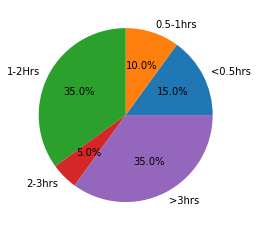

In [4]:
plt.pie(hour.sum(), labels=hour.keys(), autopct='%1.1f%%')

## Avg

In [5]:
avg = df[avg_keys]
avg.loc[:,:] = MinMaxScaler().fit_transform(avg)

avg

/home/j/.local/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,avg_pop,avg_rock,avg_hiphop,avg_edm
0,0.000000,0.650,0.000000,0.716667
1,0.533333,0.500,0.000000,0.716667
2,1.000000,0.650,1.000000,0.833333
3,0.766667,1.000,0.291667,0.666667
4,1.000000,1.000,1.000000,0.550000
5,1.000000,1.000,0.708333,0.000000
6,0.666667,0.500,0.583333,0.766667
7,1.000000,0.750,1.000000,0.666667
8,0.866667,0.150,0.291667,0.383333
9,0.866667,0.000,0.833333,0.883333


In [6]:
km = KMeans(2)
km.fit(avg)
y_hat = km.predict(avg)

(1, 0)

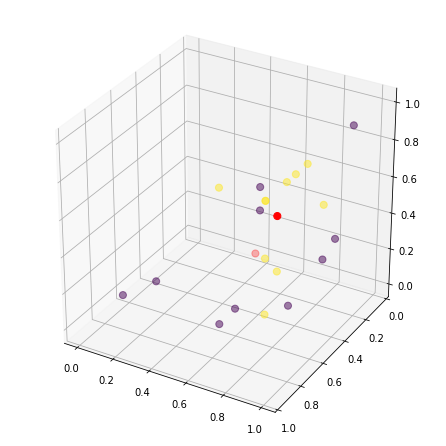

In [7]:
plt.figure(figsize=[6,6])
ax = plt.axes([0,0,1,1],projection='3d')
ax.scatter(avg['avg_pop'], avg['avg_rock'], avg['avg_hiphop'], c= km.labels_.astype(float), s=50, alpha=0.5)
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], km.cluster_centers_[:, 2], c='red', s=50)
ax.set_ylim3d(1,0)

(1, 0)

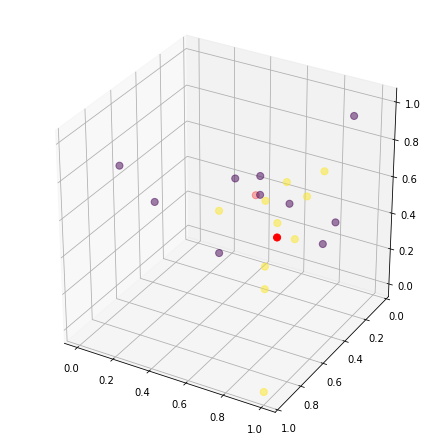

In [8]:
plt.figure(figsize=[6,6])
ax = plt.axes([0,0,1,1],projection='3d')
ax.scatter(avg['avg_pop'], avg['avg_rock'], avg['avg_edm'], c= km.labels_.astype(float), s=50, alpha=0.5)
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], km.cluster_centers_[:, 3], c='red', s=50)
ax.set_ylim3d(1,0)

(1, 0)

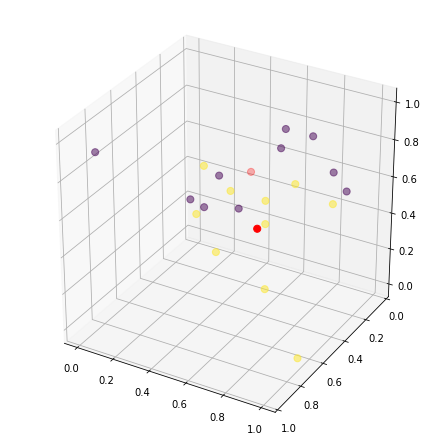

In [9]:
plt.figure(figsize=[6,6])
ax = plt.axes([0,0,1,1],projection='3d')
ax.scatter(avg['avg_rock'], avg['avg_hiphop'], avg['avg_edm'], c= km.labels_.astype(float), s=50, alpha=0.5)
ax.scatter(km.cluster_centers_[:, 1], km.cluster_centers_[:, 2], km.cluster_centers_[:, 3], c='red', s=50)
ax.set_ylim3d(1,0)

In [10]:
df['y_hat'] = y_hat
df.sort_values('y_hat')

,age21,age22,<0.5hrs,0.5-1hrs,1-2Hrs,2-3hrs,>3hrs,avg_pop,avg_rock,avg_hiphop,avg_edm,y_hat
0,1,0,0,0,0,0,1,70,86,76,83,0
17,0,1,0,0,1,0,0,100,80,86,70,0
15,1,0,0,0,0,0,1,83,100,86,90,0
13,0,1,0,0,1,0,0,96,83,80,83,0
12,1,0,1,0,0,0,0,90,80,93,80,0
8,1,0,0,0,0,1,0,96,66,83,63,0
9,1,0,0,0,0,0,1,96,60,96,93,0
3,0,0,1,0,0,0,0,93,100,83,80,0
1,0,1,0,0,1,0,0,86,80,76,83,0
6,1,0,0,1,0,0,0,90,80,90,86,0
